# Introduction to Dynamic Programming

## Overview

**Dynamic programming** is a technique to solve a complex problem by breaking it down into simpler subproblem.

Dynamic programming is used in many different fields such as mathematics, computer science, operations, economics, finance, etc...

In economics and finance, dynamic programming is essentially a method to solve a recursive formulation of an optimization problem.

## Examples

There are several examples you might have heard about before:
- Shortest path problem - what is the shortest path to travel while visiting all provincial capitals in China?
- Tower of Hanoi puzzle
<img src="Hanoi.gif">
- Cake eating problem - this is the example we will start with

## Cake eating problem

- Suppose there is a cake with initial size $W_{1}$ and time is discrete and finite where $t=1,2,\ldots,T$
- Let $c_{t}$ be consumption in period $t$ and $u(c_{t})$ be the utility of consumption
- Assume the standard Inada conditions on utility
  - $u(0)=0$
  - $u$ is continuously differentiable
  - $u'(c)>0$
  - $u''(c)<0$
  - $\lim_{c\rightarrow0}u'(c)=\infty$
  - $\lim_{c\rightarrow\infty}u'(c)=0$
- Lifetime utility is
$$\sum_{t=1}^{T}\beta^{t-1}u(c_{t})$$
  where $\beta\in[0,1]$ is the discount factor
- The cake does not grow or spoil so the law of motion for the cake over time is
$$W_{t+1}=W_{t}-c_{t}$$
- Let's solve this **sequence problem**
- The constraints can be combined so that
$$\sum_{t=1}^{T}c_{t}+W_{T+1}=W_{1}$$
- We also have non-negativity constraints $c_{t}\geq0$ for $t=1,2,\ldots,T$ and $W_{T+1}\geq0$
- Due to the Inada conditions on $u$, we only need to consider the non-negativity condition on $W_{T+1}$
- An **Euler equation** is essentially an intertemporal **first order condition** (**necessary** condition)
- However, the Euler equation is not **sufficient** - why?

## Solution
- The solution is pinned down by $W_{1}$, $W_{T+1}=0$, and the set of Euler equations
- Let the solution be denoted by $V_{T}(W_{1})$
- Suppose we extend the problem so that there is a period 0 and initial cake size $W_{0}$
- The dynamic programming approach converts a multi-period problem into a two-period or recursive problem
- With our original problem, we have the **value function**
$$\underset{c_{0}}{\max}\{u(c_{0})+\beta V_{T}(W_{1})\}$$
  subject to
$$W_{1}=W_{0}-c_{0}$$
- The solution of the problem is then determined by $c_{0}$, $W_{1}$, and $V_{T}(W_{1})$
- Therefore, it doesn't matter how the cake is consumed after period 0 as long as the agent is making optimal decisions
- **Principle of optimality**: an optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision (see Bellman, 1957)
- We are, in fact, pretending that we know $V_{T}(W_{1})$
- Assuming $V_{T}(W_{1})$ is differentiable, we have $u'(c_{0})=\beta V_{T}'(W_{1})$ and $V_{T}'(W_{1})=u'(c_{1})=\beta^{t}u'(c_{t+1})$

## Example
- Assume $u(c)=\log(c)$ and $T=1$
  - $V_{1}(W_{1})=\log(W_{1})$


- Now assume $T=2$
  - $1/c_{1}=\beta/c_{2}$ and $W_{1}=c_{1}+c_{2}$
  - $c_{1}=W_{1}/(1+\beta)$ and $c_{2}=\beta W_{1}/(1+\beta)$
  - Guess that $V_{2}(W_{1})=\log(c_{1})+\beta\log(c_{2})$ has the form $A_{2}+B_{2}\log(W_{1})$ where $A_{2}$ and $B_{2}$ are constants
  - $A_{2}=\log(1/(1+\beta))+\beta\log(\beta/(1+\beta))$ and $B_{2}=(1+\beta)$


- Now assume $T=3$
  - $V_{3}(W_{1})=\underset{W_{2}}{\max}\{\log(W_{1}-W_{2})+\beta V_{2}(W_{2})\}$
  - F.O.C. w.r.t. $W_{2}$ is $1/c_{1}=\beta V_{2}'(W_{2})$
  - The F.O.C. simplifies to $\frac{1}{c_{1}}=\beta\frac{B_{2}}{W_{2}}=\frac{\beta}{c_{2}}$ (the consumption in the second-period of the three-period problem is the same as the consumption in the first period of the two-period problem)
  - Also, $1/c_{2}=\beta/c_{3}$ from the two-period problem
  - With the resource constraint we have $c_{1}=W_{1}/(1+\beta+\beta^{2})$, $c_{2}=\beta W_{1}/(1+\beta+\beta^{2})$, $c_{3}=\beta^{2}W_{1}/(1+\beta+\beta^{2})$
  - $V_{3}(W_{1})=A_{3}+B_{3}\log(W_{1})$ where $A_{3}=\log(1/(1+\beta+\beta^{2}))+\beta\log(\beta/(1+\beta+\beta^{2}))+\beta^{2}\log(\beta^{2}/(1+\beta+\beta^{2}))$ and $B_{3}=(1+\beta+\beta^{2})$

## Infinite horizon

- Consider the infinite horizon sequence problem:
$$\underset{\{c_{t}\}_{0}^{\infty},\{W_{t}\}_{1}^{\infty}}{\max}\sum_{t=0}^{\infty}\beta^{t}u(c_{t})$$
  with **transition equation**
$$W_{t+1}=W_{t}-c_{t}$$
- We can convert the sequence problem into a recursive or dynamic programming problem:
$$V(W)=\underset{c}{\max}\{u(c)+\beta V(W-c)\}$$
  with transition equation
$$W'=W-c$$

## The functional equation

- In the previous dynamic programming problem, $W$ is the **state variable** and $c$ is the **control variable**
- We can alternatively and equivalently write the dynamic problem as:
$$V(W)=\underset{W'}{\max}\{u(W-W')+\beta V(W')\}$$
- The equation above is known as a **functional equation** or a **Bellman equation** - the unknown is the function itself!

## Properties of value functions

- If the value function exists, then we can take the F.O.C. w.r.t. to $c$ to get
$$u'(c)=\beta V'(W')$$
- We also have
$$V'(W)=u'(c)$$
  and we can iterate to get
$$V'(W')=u'(c')$$
- Therefore the Euler equation is
$$u'(c)=\beta u'(c')$$

## Policy functions

- After we solve the value function, we can express the choice of consumption or next period cake size as a **policy function** or a **decision rule**
$$c=\mathcal{C}(W)$$
  or
$$W'=\mathcal{W}(W)$$
- We can write the Euler equation in terms of the policy function
$$u'(\mathcal{C}(W))=\beta u'(\mathcal{C}(W-\mathcal{C}(W)))$$

## Infinite horizon cake eating problem

- Guess that the value function takes the form
$$V(W)=A+B\log(W)$$
- Then the following must hold
$$A+B\log(W)=\underset{W'}{\max}\{\log(W-W')+\beta(A+B\log(W'))\}$$
- Let's solve this by hand
- Then let's solve this on the computer!

247


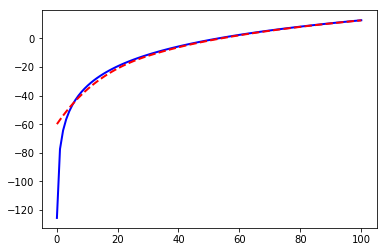

Time elapsed:  0.41861963272094727


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

beta = 0.95
num_points = 100
tol = 10**(-5)

w_vec = np.reshape(np.linspace(0.1,100,num_points),num_points)
wprime = w_vec-0.05
value_old = np.ones(num_points)
value_new = np.zeros(num_points)
policy = np.zeros(num_points)
ctr = 0

while(np.max(np.abs(value_old-value_new)) > tol):
    np.copyto(value_old,value_new)
    for ii in np.arange(num_points):
        value_new[ii] = np.max(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*value_old[wprime<=w_vec[ii]])
        policy[ii] = np.argmax(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*value_old[wprime<=w_vec[ii]])
    ctr = ctr+1

print(ctr)

A = 1/(1-beta)**2*np.log(1-beta)+beta/(1-beta)**2*np.log(beta/(1-beta))
B = 1/(1-beta)

value_analytical = A+B*np.log(w_vec)

plt.plot(w_vec, value_analytical, 'b', w_vec, value_new, 'r--', linewidth=2)
plt.show()

end = time.time()
print('Time elapsed: ', end-start)

## Exercises

## Problem 1

Consider a stochastic version of the infinite cake eating problem. There are many ways to introduce shocks to a dynamic program and we just explore one way in this problem. Suppose there are 'taste' shocks that take on one of two values $\epsilon \in \{\epsilon_{l}=1,\epsilon_{h}=2\}$.  There is a Markov transition matrix between the taste shocks which is given by,

$$\mathcal{E}=\left[\begin{array}{cc}
0.9 & 0.1\\
0.4 & 0.6
\end{array}\right].$$

The Bellman equation is then,

$$V(W,\epsilon)=\underset{W'}{\max}\{\epsilon u(W-W')+\beta \text{E}_{\epsilon' \mid \epsilon}V(W',\epsilon')\}$$

1. Solve for the value function and decision rules
2. Plot the value function and decision rules

## Problem 2

Suppose we have a heterogeneous firm model with the following profit function:

$$\pi_{it}=z_{it}k_{it}^{\theta}$$

where $\pi_{it}$ is the profit, $z_{it}\in Z$ is the productivity shock, $k_{it}\in[0,\bar{k}]\equiv K$ is the capital stock, and $\theta<1$ is a “returns-to-scale” parameter. The dividend of firm equals:

$$d_{it}=\pi_{it}+(1-\delta)k_{it}-k_{i,t+1}\geq$$

where $\delta$ is the depreciation rate. Firms maximize the expected discounted dividend stream, i.e.

$$\max_{k_{it}}\sum_{t=0}^{\infty}\beta^{t}d_{it}.$$

To solve the model, we set $\theta=0.5$, $\delta=0.1$, and $\beta=0.95$. The productivity shock has three levels $z_{l}=1$, $z_{m}=2$, $z_{h}=7$, and the transition matrix for the productivity shock is given by,

$$\mathcal{Z}=\left[\begin{array}{ccc}
0.9 & 0.05 & 0.05\\
0.15 & 0.7 & 0.15\\
0.1 & 0.1 & 0.8
\end{array}\right].$$

For example $\text{Pr}(z_{l}\mid z_{l})=0.9$ and $\text{Pr}(z_{m}\mid z_{l})=0.05.$

1. State the recursive formulation
2. Solve the nonstochastic version of the problem above where the firm receives $z_{l}=1$ forever
3. Solve the problem as stated above and plot the value function over $K$ for each element of $Z$
4. Plot the decision rules
5. Simulate an example firm for 100 periods
6. Speed up the code and report the time improvement